In [ ]:
# Visualizziamo i nuovi casi giornalieri di COVID in Italia
# Usiamo i dati della protezione civile, disponibili qua: https://github.com/pcm-dpc/COVID-19
# In particolare, ho scaricato nella cartella data i file di questa cartella: https://github.com/pcm-dpc/COVID-19/tree/master/dati-andamento-nazionale

# Solo gli ultimi: dal 2021-11-21 al 2021-12-14

# Nella cartella di questo esempio ci sono anche due grafici di riferimento che vogliamo imitare:
# - Un grafico dell'andamento dei nuovi contagi giornalieri, tratto dal Sole24Ore: https://lab24.ilsole24ore.com/coronavirus/
# - Un grafico dell'andamento settimanale, tratto da una newsletter de ilpost.it

In [22]:
import glob

# Importiamo il percorso di tutti i file
filenames = sorted(glob.glob("data/*.csv"))
filenames

['data/dpc-covid19-ita-andamento-nazionale-20211121.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211122.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211123.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211124.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211125.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211126.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211127.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211128.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211129.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211130.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211201.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211202.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211203.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211204.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211205.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211206.csv',
 'data/dpc-covid19-ita-andamento-nazionale-20211207.csv',
 'data/dpc-cov

In [23]:
import pandas as pd

# Vediamo cosa contiene il primo file -- avranno tutti lo stesso formato
data = pd.read_csv(filenames[0])
data

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
0,2021-11-21T17:00:00,ITA,4345,520,4865,143895,148760,5359,9709,4643751,...,114499740,37340316,NaN,35,NaN,NaN,4731444,194244,65859791,48639949


In [24]:
# Prendiamo i nuovi casi positivi di questo giorno
nuovi_positivi = data['nuovi_positivi']
nuovi_positivi

0    9709
Name: nuovi_positivi, dtype: int64

In [39]:
# Ora facciamolo per tutti gli ultimi 21 giorni, e mettiamo i risultati in una lista


positivi_giornalieri_ultimi_21_giorni = []

for filename in filenames[-21:]:
    data = pd.read_csv(filename)
    nuovi_positivi = data['nuovi_positivi'].values[0]
    positivi_giornalieri_ultimi_21_giorni.append(nuovi_positivi)

positivi_giornalieri_ultimi_21_giorni

[12448,
 13764,
 13686,
 12877,
 12932,
 7975,
 12764,
 15085,
 16806,
 17030,
 16632,
 15021,
 9503,
 15756,
 17959,
 12527,
 20497,
 21042,
 19215,
 12712,
 20677]

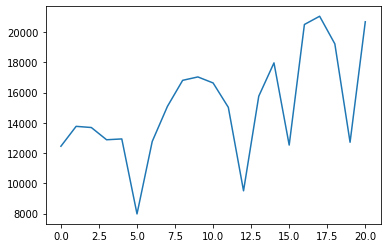

In [50]:
import matplotlib.pyplot as plt

# Confrontiamo questo con il grafico del Sole24Ore
plt.plot(positivi_giornalieri_ultimi_21_giorni)

In [73]:
# Ultime tre settimane, totale settimanale

weekly = []
for monday_index in range(0,21,7):
    week = positivi_giornalieri_ultimi_21_giorni[monday_index:monday_index + 7]
    print(week)
    weekly.append(sum(week))

weekly

[12448, 13764, 13686, 12877, 12932, 7975, 12764]
[15085, 16806, 17030, 16632, 15021, 9503, 15756]
[17959, 12527, 20497, 21042, 19215, 12712, 20677]


[86446, 105833, 124629]

Text(-1, 125629, '124629')

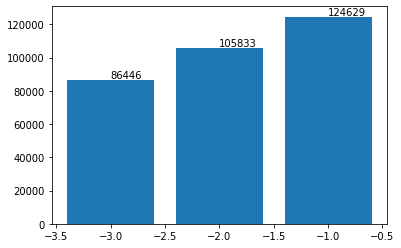

In [80]:
# Confrontiamo questo grafico con quello de ilPost.
# I numeri non coincidono perché stiamo prendendo gli ultimi 21 giorni invece
# delle ultime tre settimane da lunedì a domenica.
# Siamo però riusciti a ottenere un grafico simile.

weeks = [-3, -2, -1]

plt.bar(weeks, weekly)
plt.text(-3, weekly[0] + 1000, weekly[0])
plt.text(-2, weekly[1] + 1000, weekly[1])
plt.text(-1, weekly[2] + 1000, weekly[2])
